In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Last Date: 2017-08-23 00:00:00
Query Date: 2016-08-23


Text(0, 0.5, 'Precipitation (Inches)')

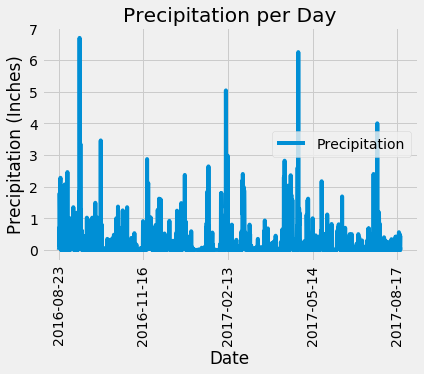

In [71]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
lastdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
lastdate = dt.datetime.strptime(lastdate[0], '%Y-%m-%d')
querydate = dt.date(lastdate.year -1, lastdate.month, lastdate.day)
print(f'Last Date: {lastdate}\nQuery Date: {querydate}')

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp)\
               .filter(measurement.date >= querydate).all() 

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_data, columns = ['Date', 'Precipitation'])
prcp_df = prcp_df.dropna()
prcp_df = prcp_df.set_index("Date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(["Date"], ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
fig1 = prcp_df.plot(rot=90)
fig1.set_title("Precipitation per Day")
fig1.set_ylabel("Precipitation (Inches)")

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(func.count(station.id)).all()
total_stations

[(9)]

In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station))\
                         .group_by(measurement.station)\
                         .order_by(func.count(measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [68]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
mostactivestationstats = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
                                .filter(measurement.station == 'USC00519281').first()
print(f'Lowest Temp: {mostactivestationstats[0]}\nHighest Temp: {mostactivestationstats[1]}\nAverage Temp: {mostactivestationstats[2]}')

Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66378066378067


Last Date: 2017-08-18 00:00:00
Query Date: 2016-08-18


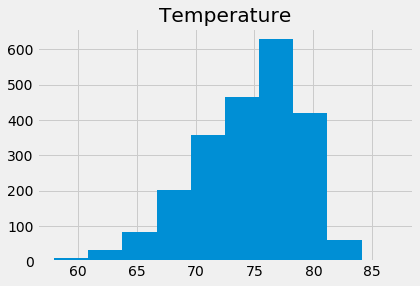

In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastdate = session.query(measurement.date)\
                  .filter(measurement.station == "USC00519281")\
                  .order_by(measurement.date.desc()).first()
lastdate = dt.datetime.strptime(lastdate[0], '%Y-%m-%d')
querydate = dt.date(lastdate.year -1, lastdate.month, lastdate.day)
print(f'Last Date: {lastdate}\nQuery Date: {querydate}')

tobs_data = session.query(measurement.date, measurement.tobs)\
               .filter(measurement.date >= querydate).all() 

# Save the query results as a Pandas DataFrame and set the index to the date column
tobs_df = pd.DataFrame(tobs_data, columns = ['Date', 'Temperature'])
tobs_df = tobs_df.dropna()
tobs_df = tobs_df.set_index("Date")

tobs_df = tobs_df.sort_values(["Date"], ascending=True)

fig2 = tobs_df.hist()

## Bonus Challenge Assignment

In [79]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
